- Ajustad un modelo de Random Forest a nuestros datos.

- Calculad las métricas a nuestro nuevo modelo.

- Comparad las métricas con el modelo hecho hasta ahora. ¿Cuál es mejor?

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
from tqdm import tqdm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_esta = pd.read_csv("./Datos/tiempo_esta_cod.csv", index_col = 0)
df_esta.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_Mainly Clear,mes,hora
0,-0.755162,-0.366931,1.320679,-0.201398,-1.722126,-1.646271,0,0,3
1,-0.645784,-0.430150,0.616199,2.334455,-0.673565,-2.485747,0,0,0
2,-0.662611,-0.484338,0.488112,2.467921,-0.673565,-2.485747,0,0,0
3,-0.729921,-0.556589,0.488112,2.334455,-0.673565,-2.485747,0,0,0
4,-0.755162,-0.556589,0.552155,2.334455,-0.673565,-2.485747,0,0,0


In [3]:
# separamos los datos en X e y

X = df_esta.drop("Weather_Mainly Clear", axis = 1)
y = df_esta["Weather_Mainly Clear"]

In [4]:
# separamos en train y test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
# lo primero que tenemos que hacer es definir un diccionario con los hiperparámetros que queremos modificar y los valores que queremos 

param = {"max_depth": [2,4,6,8],
        "max_features": [1,2,3],
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10, 50,100]} 

In [40]:
gs_rf = GridSearchCV(
            estimator=RandomForestClassifier(random_state=42), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1) # para que no nos printee ningún mensaje en pantalla

In [41]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [8], 'max_features': [2],
                         'min_samples_leaf': [50, 100],
                         'min_samples_split': [50, 100]},
             verbose=-1)

In [42]:
# saquemos ahora cual es nuestro mejor bosque

bosque = gs_rf.best_estimator_
bosque

RandomForestClassifier(max_depth=8, max_features=2, min_samples_leaf=50,
                       min_samples_split=50, random_state=42)

In [43]:
# dibujemos los árboles de nuestro bosque

# for arbol in tqdm(bosque.estimators_):
#     fig = plt.figure(figsize=(20, 10))
#     tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
#     plt.show()

In [44]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [45]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [46]:
df_forest_results = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest")
df_forest_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.638323,0.618938,0.661728,0.639618,0.277450,test,Random Forest
1,0.686527,0.677140,0.734862,0.704821,0.371825,train,Random Forest


In [47]:
df_forest_results.to_csv("./Datos/resultados_rf.csv")

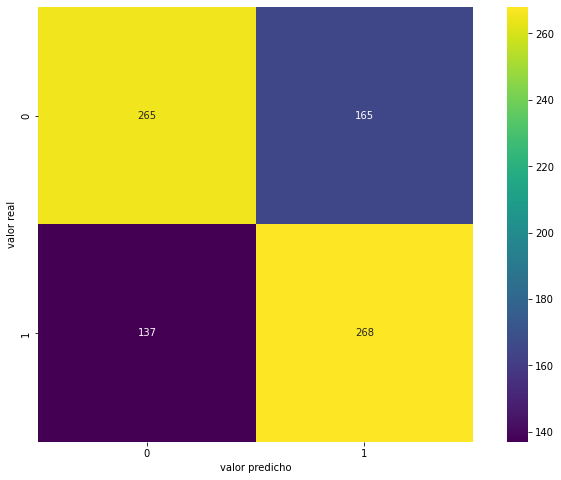

In [48]:
# MATRIZ DE CONFUSIÓN PARA DATOS ESTANDARIZADOS

mat_lr1 = confusion_matrix(y_test, y_pred_test_rf)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr1, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [49]:
df_forest_results = metricas(y_test, y_pred_test_rf,y_train,  y_pred_train_rf, "Random Forest")
df_forest_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.638323,0.618938,0.661728,0.639618,0.277450,test,Random Forest
1,0.686527,0.677140,0.734862,0.704821,0.371825,train,Random Forest


In [50]:
df_regresion_results = pd.read_csv("./Datos/resultados_rlog.csv", index_col = 0)
df_regresion_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.595210,0.573951,0.641975,0.606061,0.192475,test,RLog estandarizadas
1,0.614072,0.611472,0.664315,0.636799,0.226614,train,RLog estandarizadas
0,0.577246,0.557522,0.622222,0.588098,0.156578,test,RLog sin estandarizar
1,0.608383,0.605249,0.664315,0.633408,0.215048,train,RLog sin estandarizar


In [51]:
df_decision_results = pd.read_csv("./Datos/resultados_dt.csv", index_col = 0)
df_decision_results

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.610778,0.592166,0.634568,0.612634,0.222477,test,Decission Tree Esta I
1,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
0,0.613174,0.598558,0.614815,0.606577,0.226264,test,Decision tree Esta II
1,0.669760,0.675882,0.675485,0.675684,0.339301,train,Decision tree Esta II


In [52]:
# concatenamos el csv anterior con los resultados obtenidos en este modelo

df_todos_resultados = pd.concat([df_regresion_results, df_decision_results, df_forest_results], axis = 0).reset_index()
df_todos_resultados.drop(["index"], axis =1, inplace=True)

In [53]:
df_todos_resultados.style.background_gradient(cmap='mako')

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.595210,0.573951,0.641975,0.606061,0.192475,test,RLog estandarizadas
1,0.614072,0.611472,0.664315,0.636799,0.226614,train,RLog estandarizadas
2,0.577246,0.557522,0.622222,0.588098,0.156578,test,RLog sin estandarizar
3,0.608383,0.605249,0.664315,0.633408,0.215048,train,RLog sin estandarizar
4,0.610778,0.592166,0.634568,0.612634,0.222477,test,Decission Tree Esta I
5,1.000000,1.000000,1.000000,1.000000,1.000000,train,Decission Tree Esta I
6,0.613174,0.598558,0.614815,0.606577,0.226264,test,Decision tree Esta II
7,0.669760,0.675882,0.675485,0.675684,0.339301,train,Decision tree Esta II
8,0.638323,0.618938,0.661728,0.639618,0.277450,test,Random Forest
9,0.686527,0.677140,0.734862,0.704821,0.371825,train,Random Forest


Chequear la importancia de las variables

In [54]:
# vamos a crearnos un dataframe, igual que hicimos en la clase anterior con la importancia de cada una de las variables incluidas en el modelo

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
5,Press_kPa,0.291206
0,Temp_C,0.170532
1,Dew Point Temp_C,0.127348
3,Wind Speed_km/h,0.109791
4,Visibility_km,0.099414
2,Rel Hum_%,0.089795
6,mes,0.084414
7,hora,0.027500


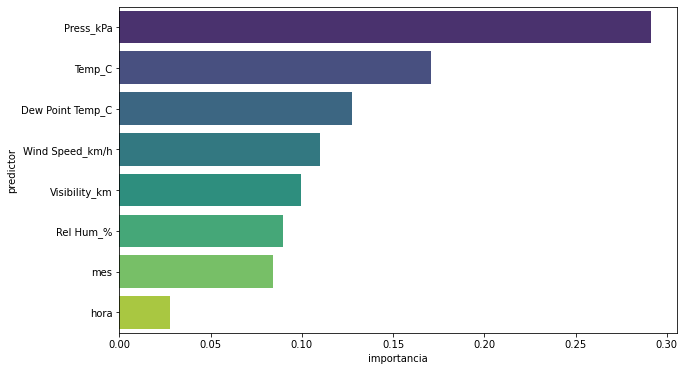

In [55]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

Hemos probado con otros hiperparámetros para reducir el overfitting cambiando min leaf y min split a [50,100]. Se reducía el sobre entrenamiento, pero el test sale perjudicado así que lo hemos descartado.

En cualquiera de los casos, de los cuatro modelos, el mejor es el Random Forest, a pesar del overfitting